Horacio Flores

#Resource

https://stackoverflow.com/questions/61901365/modulenotfounderror-no-module-named-sklearn-externals-six

https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4

https://mljar.com/blog/visualize-decision-tree/


# A graphical example

In [240]:
# %pip install sklearn
# %pip install mglearn
# %brew install graphviz

In [241]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [242]:
import numpy as np
from matplotlib import pyplot

# Some functions to plot our points and draw the models
def plot_points(features, labels, size_of_points=100):
    X = np.array(features)
    y = np.array(labels)
    class1 = X[np.argwhere(y==0)]
    class2 = X[np.argwhere(y==1)]
    class3 = X[np.argwhere(y==2)]
    pyplot.scatter([s[0][0] for s in class1],
                [s[0][1] for s in class1],
                s = size_of_points,
                color = 'red',
                edgecolor = 'k',
                marker = '^')
    pyplot.scatter([s[0][0] for s in class2],
                [s[0][1] for s in class2],
                s = size_of_points,
                color = 'green',
                edgecolor = 'k',
                marker = 's')
    pyplot.scatter([s[0][0] for s in class3],
                [s[0][1] for s in class3],
                s=size_of_points,
                color='blue',
                edgecolor='k',
                marker='o')

def plot_model(X, y, model, size_of_points=100):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=['red', 'green'], alpha=0.2, levels=range(-1,2))
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y, size_of_points)
    pyplot.show()
    
def display_tree(dt, feature_names, class_names):
    from sklearn.externals.six import StringIO  
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=feature_names,
                    class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


## A Toy Example

In [243]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import utils

In [244]:
iris = datasets.load_iris()
dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataset['class_name'] = [iris.target_names[i] for i in iris.target]
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


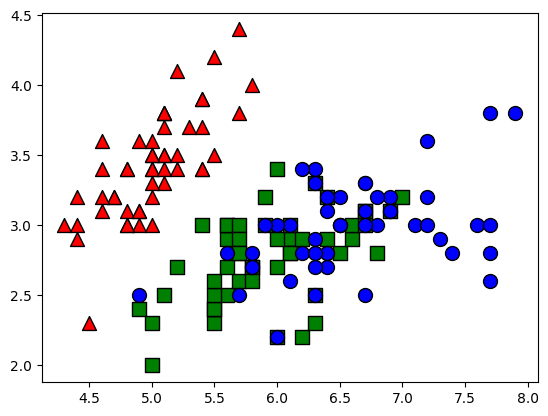

In [245]:
features = iris.data
labels = iris.target

plot_points(features, labels)

# Building a decision tree using Gini index

In [246]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features, labels)
decision_tree.score(features, labels)

1.0

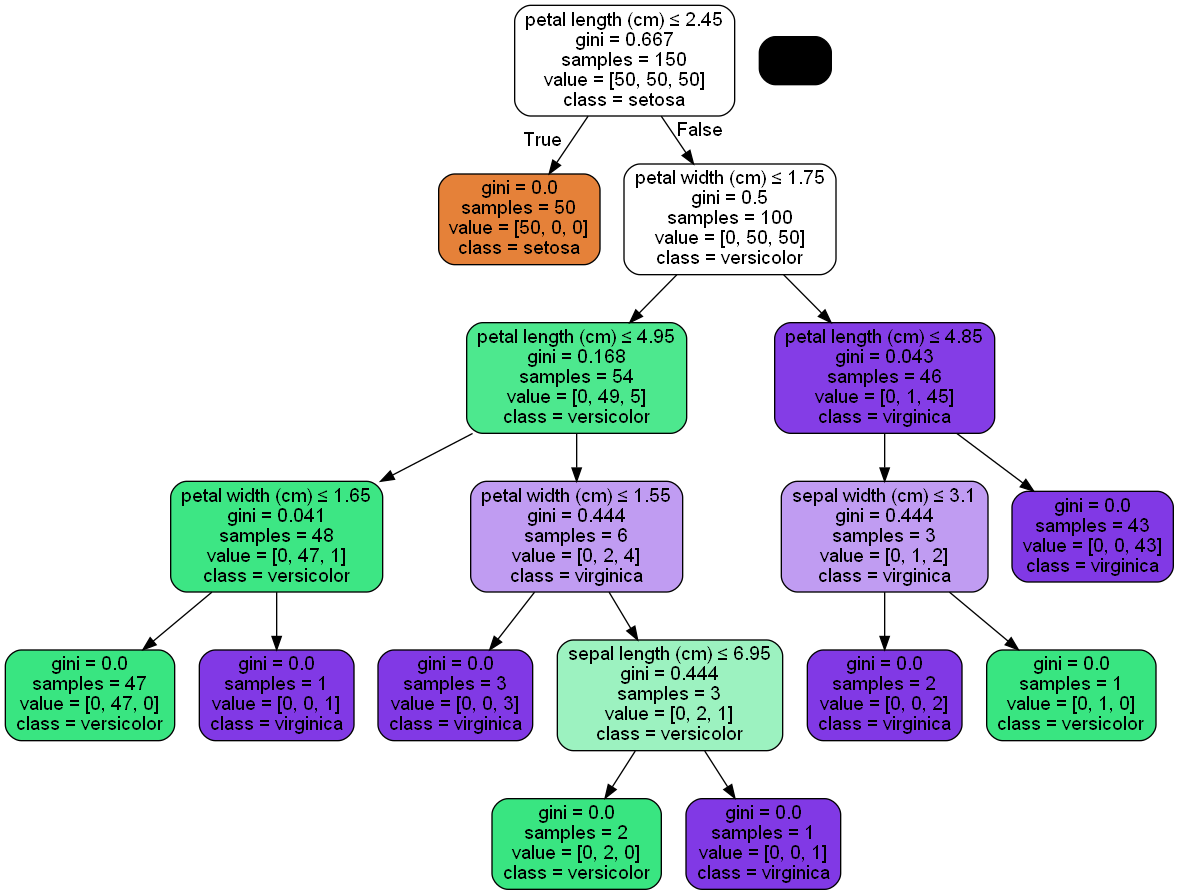

In [247]:
display_tree(decision_tree, iris.feature_names, iris.target_names)

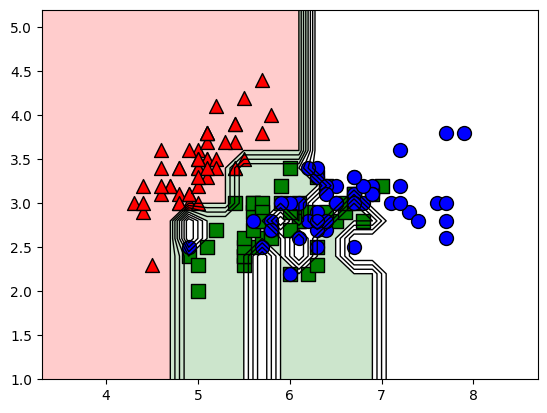

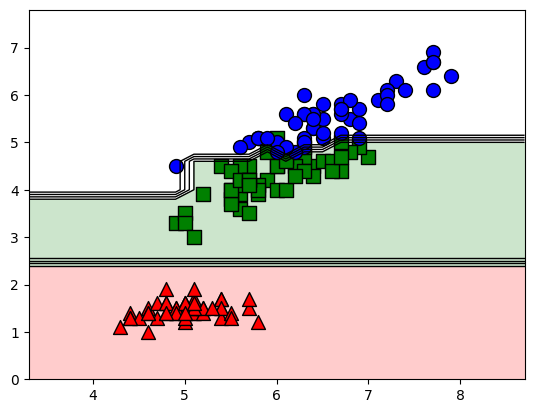

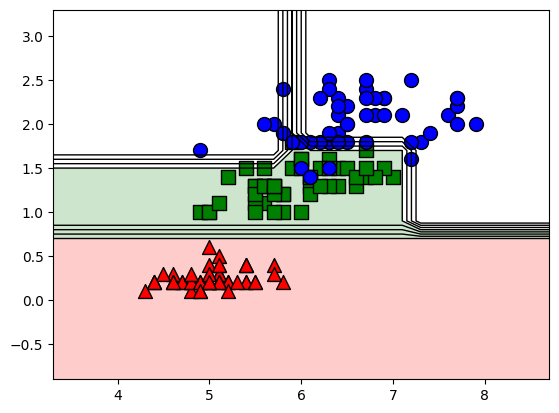

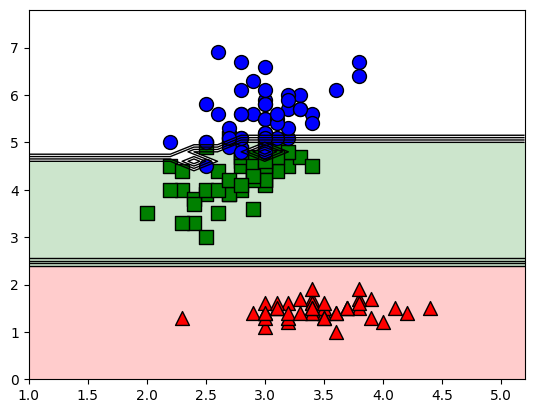

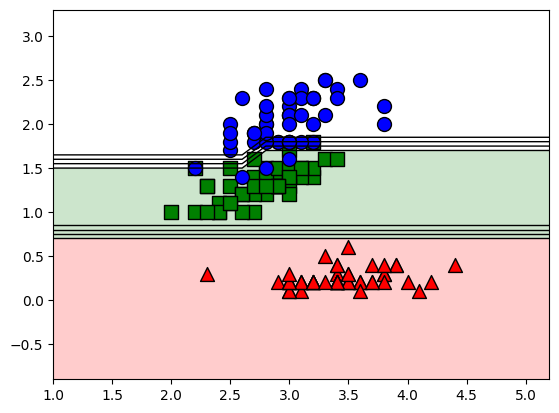

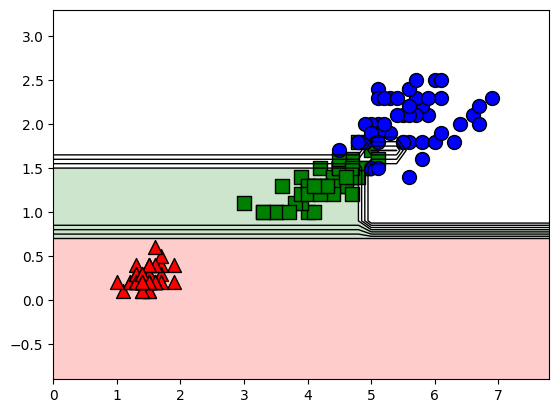

In [248]:
column_combinations = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]] # 0 = sepal length, 1 = sepal width, 2= petal length, 3 = petal width

for columns in column_combinations:
    
    decision_tree.fit(features[:, columns], labels)
    
    plot_model(features[:, columns], labels, decision_tree)


# Building a decision tree using entropy

In [249]:
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy.fit(features, labels)
decision_tree_entropy.score(features, labels)

1.0

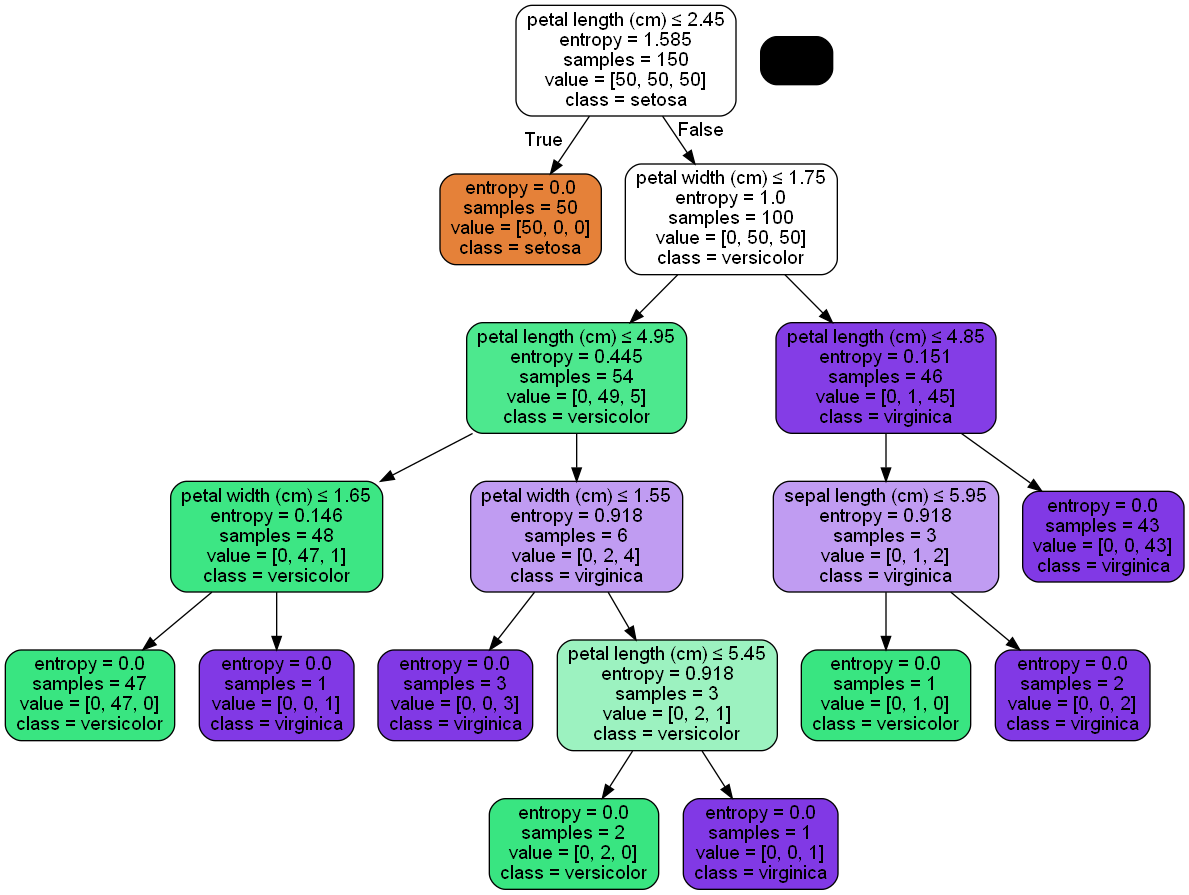

In [250]:
display_tree(decision_tree_entropy, iris.feature_names, iris.target_names)


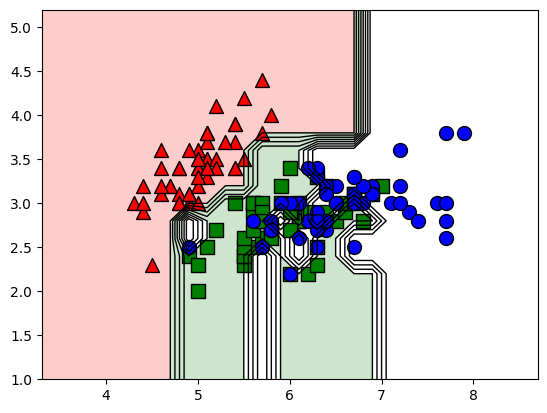

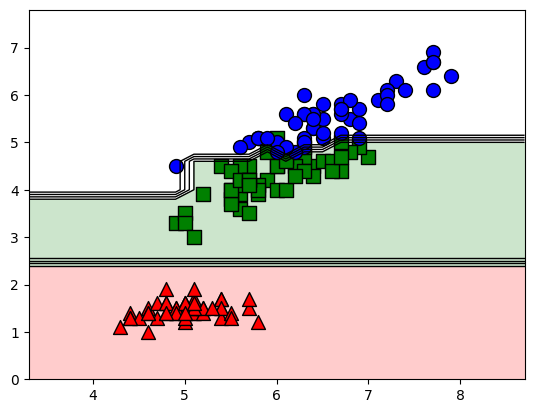

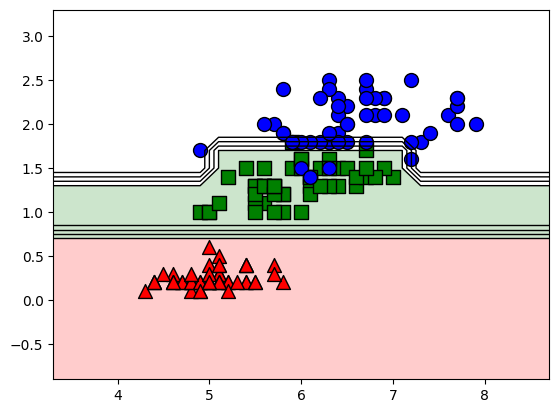

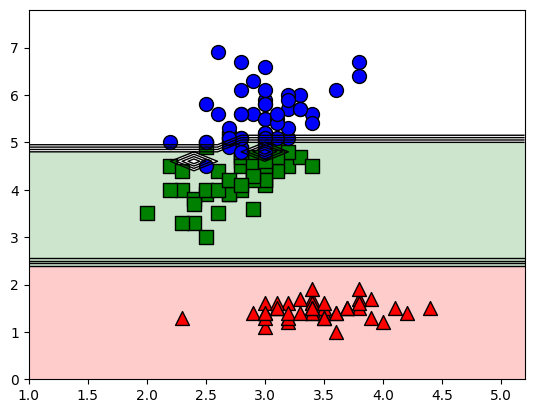

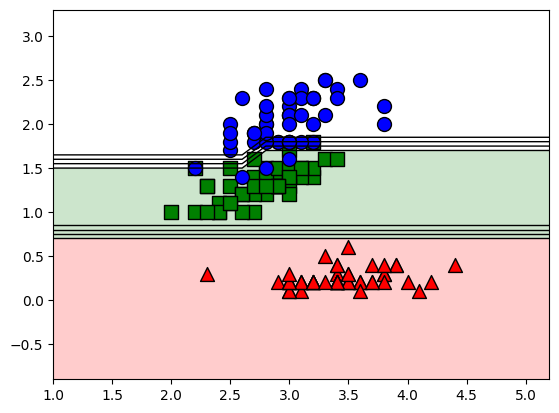

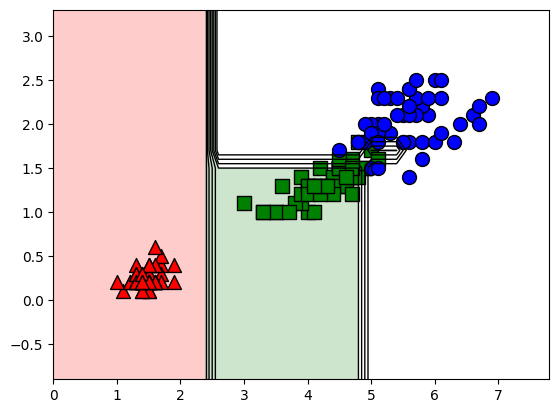

In [251]:

for columns in column_combinations:
    
    decision_tree_entropy.fit(features[:, columns], labels)
    
    plot_model(features[:, columns], labels, decision_tree_entropy)


# Building a decision tree of depth one (a vertical or horizontal line)

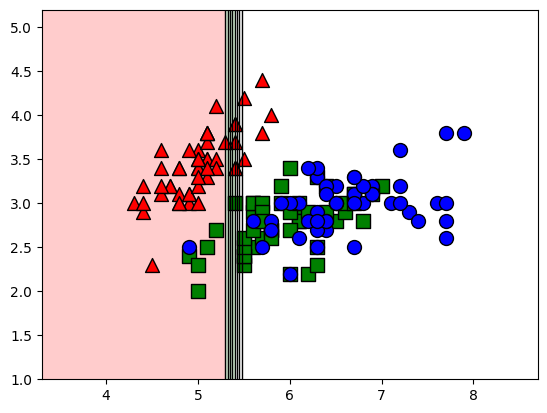

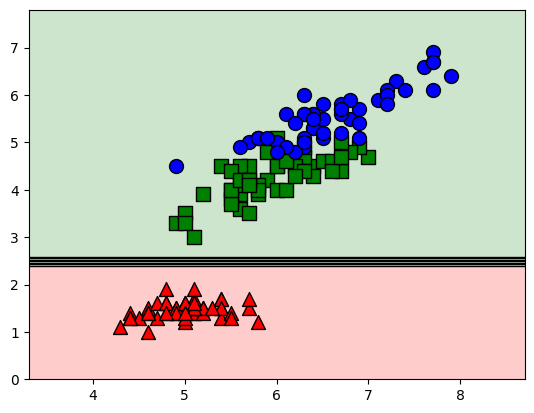

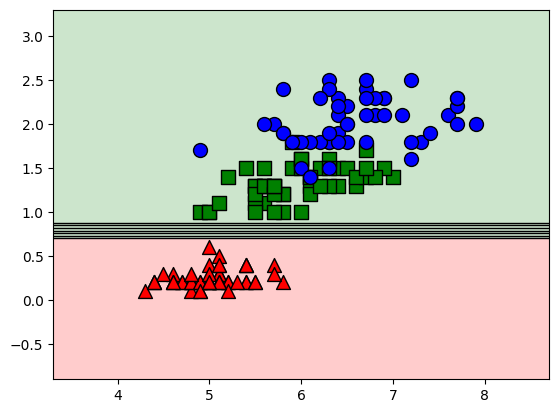

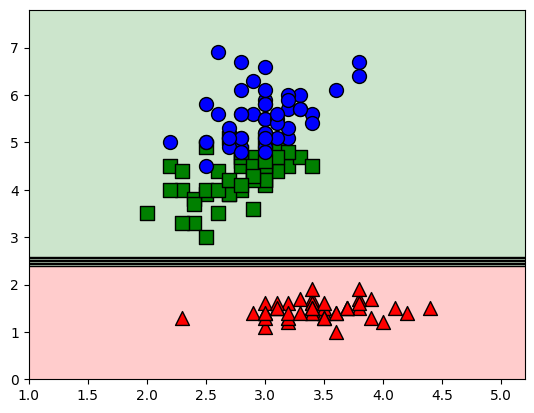

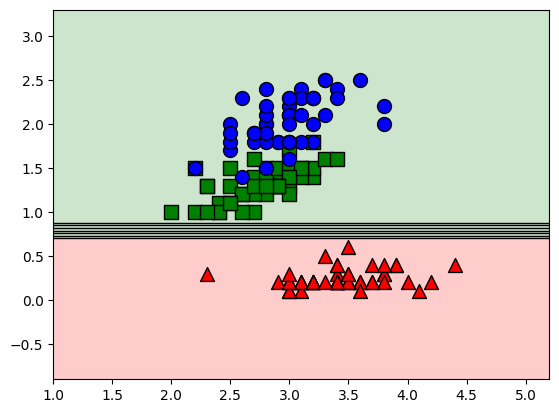

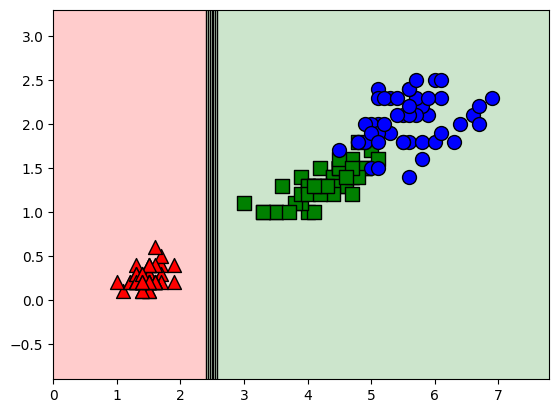

In [252]:
decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1)
decision_tree_depth_1.fit(features, labels)
decision_tree_depth_1.score(features, labels)

for columns in column_combinations:
    
    decision_tree_depth_1.fit(features[:, columns], labels)
    
    plot_model(features[:, columns], labels, decision_tree_depth_1)


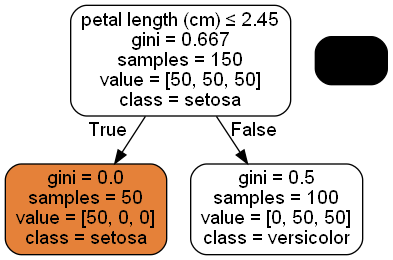

In [253]:
decision_tree_depth_1.fit(features, labels)

display_tree(decision_tree_depth_1, iris.feature_names, iris.target_names)

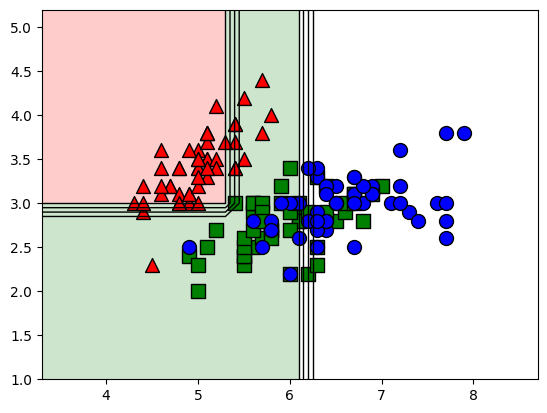

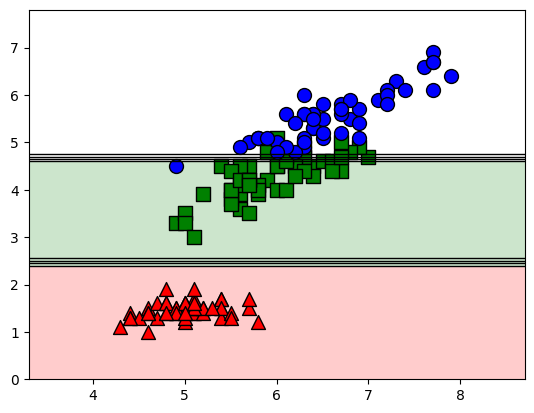

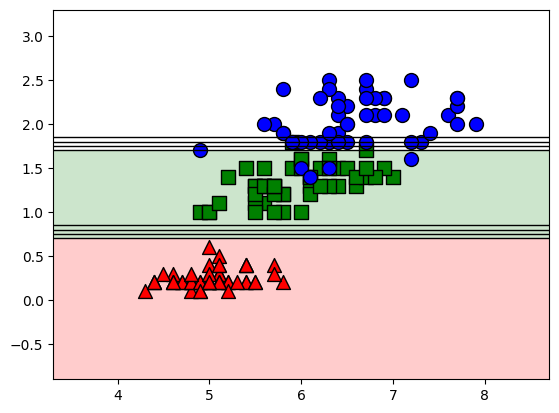

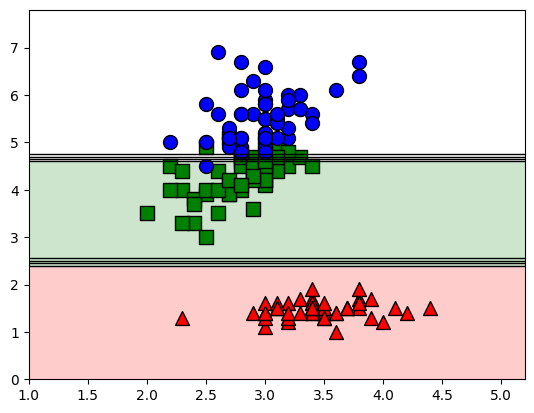

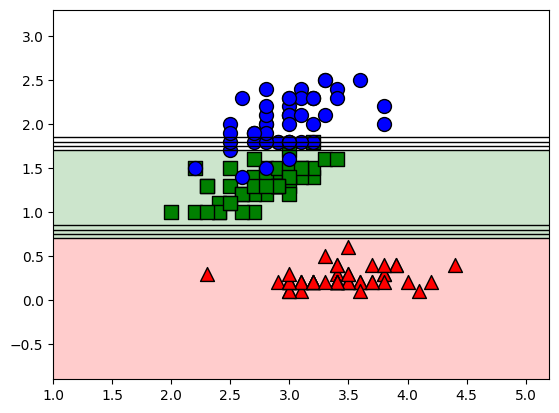

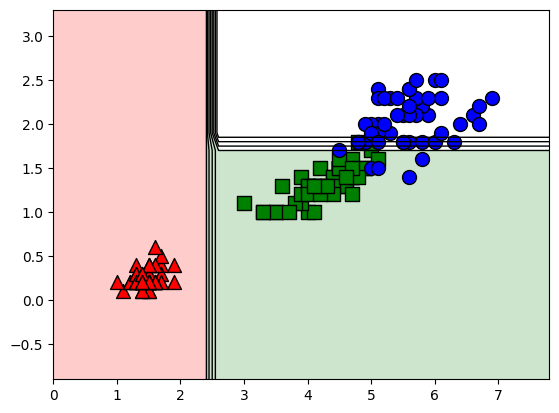

In [254]:
decision_tree_depth_2 = DecisionTreeClassifier(max_depth=2)
decision_tree_depth_2.fit(features, labels)
decision_tree_depth_2.score(features, labels)


for columns in column_combinations:
    
    decision_tree_depth_2.fit(features[:, columns], labels)
    
    plot_model(features[:, columns], labels, decision_tree_depth_2)


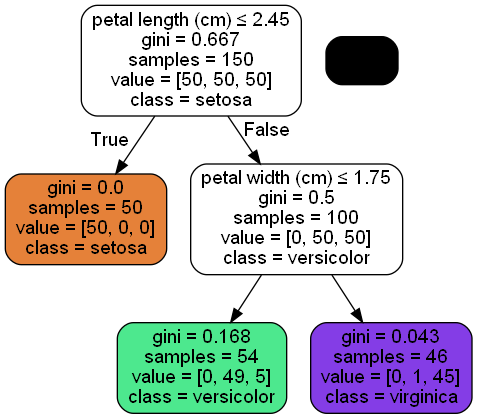

In [255]:
decision_tree_depth_2.fit(features, labels)

display_tree(decision_tree_depth_2, iris.feature_names, iris.target_names)